In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [16]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:

# Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [18]:
train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000)

## Observation
The model converges smoothly under standard training conditions and serves as a baseline for subsequent perturbation experiments.


In [19]:
# Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.net(x)

model = MLP().to(device)


In [20]:
# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_losses = []

Epoch 1/10, Loss: 0.2783
Epoch 2/10, Loss: 0.1120
Epoch 3/10, Loss: 0.0794
Epoch 4/10, Loss: 0.0624
Epoch 5/10, Loss: 0.0495
Epoch 6/10, Loss: 0.0433
Epoch 7/10, Loss: 0.0336
Epoch 8/10, Loss: 0.0270
Epoch 9/10, Loss: 0.0276
Epoch 10/10, Loss: 0.0222


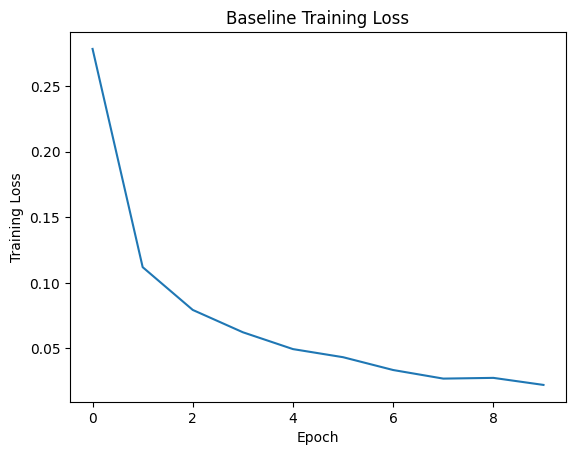

In [21]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# Plot training loss
plt.figure()
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Baseline Training Loss")
plt.show()

# Save model
torch.save(model.state_dict(), "../baseline_model.pth")